# Conjugate Gradient for sparse linear systems

Author: Alexandre Gramfort

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import linalg as sp_linalg

### Generate simulated data

In [2]:
np.random.seed(0)
n_samples, n_features = 100, 1
X = np.random.randn(n_samples, n_features)
w = np.random.randn(n_features)
b = 10.
y = np.dot(X, w) + b
y += 0.3 * np.random.randn(n_samples)

In [3]:
y.shape, X.shape

((100,), (100, 1))

In [4]:
X = sparse.csr_matrix(X)  # make X sparse
X

<100x1 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [5]:
def sparse_ridge(X, y, alpha=0., x0=None):
    n_features = X.shape[1]
    # matvec = lambda w: X.T.dot(X.dot(w)) + alpha * w
    def matvec(w):
        return X.T.dot(X.dot(w)) + alpha * w
    A = sp_linalg.LinearOperator((n_features, n_features), 
                                 matvec=matvec, dtype=X.dtype)
    w_hat, info = sparse.linalg.cg(A, X.T.dot(y), x0=x0)
    return w_hat

alpha = 0.  # the regularization parameter
w_hat = sparse_ridge(X, y)

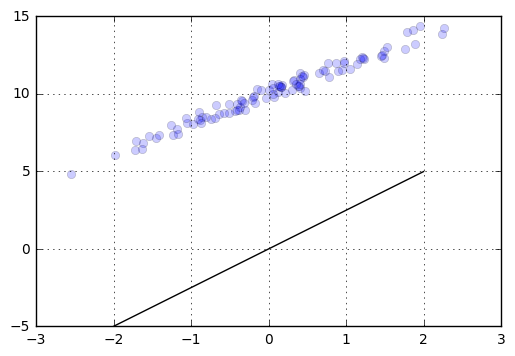

In [6]:
def plot_data(w, b=0.):
    plt.plot(X.toarray()[:, 0], y, 'o', alpha=0.2)

    xx = np.linspace(-2, 2, 100)
    yy = np.dot(xx[:, np.newaxis], w) + b
    plt.plot(xx, yy, 'k')
    plt.grid('on')

plot_data(w_hat)

In [7]:
Xb = sparse.hstack((X, np.ones((n_samples, 1))))

In [8]:
Xb.shape

(100, 2)

In [9]:
alpha = 0.  # regularization parameter lambda
w_hat, b_hat = sparse_ridge(Xb, y, alpha=alpha)

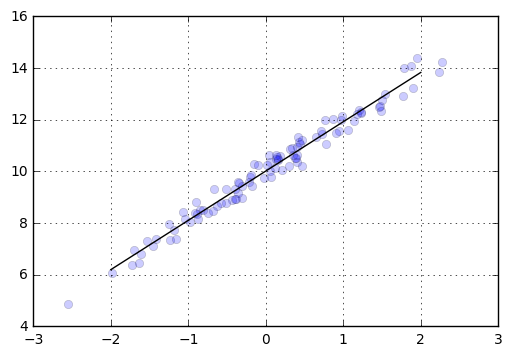

In [10]:
plot_data(w_hat, b_hat)

## Let's do some "Big Data"

In [ ]:
n_samples, n_features = 10000, 1000000
X = sparse.rand(n_samples, n_features, density=0.00001, format='csr')

In [ ]:
X.nnz

In [ ]:
w = np.random.randn(n_features)
y = X.dot(w)

In [ ]:
w_hat = sparse_ridge(X, y, alpha=0.01)

In [ ]:
w_hat.shape

### The problem of warm start

In [ ]:
%timeit sparse_ridge(X, y, alpha=0.01, x0=None)

In [ ]:
%timeit sparse_ridge(X, y, alpha=0.02, x0=w_hat)